<a href="https://colab.research.google.com/github/Jueunkim429/Colab-Notebooks/blob/main/MNE_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 5.5 MB/s 


# MNE EEG analysis - Event-Related Potentials(ERPs)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
raw_file = root / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_file, preload=False, verbose=False)
raw.pick(['eeg','eog']).load_data()

events_file = root /'sample_audvis_filt-0-40_raw-eve.fif'
events=mne.read_events(events_file)

raw.crop(tmax=90) # in seconds (happens in-place)
events = events[events[:,0] <= raw.last_samp]

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 905GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


## Check data

In [6]:
print(raw.info)

<Info | 15 non-empty values
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


## Channel names

In [7]:
channel_renaming_dict = {name : name.replace(' 0','').lower()
                        for name in raw.ch_names}
_=raw.rename_channels(channel_renaming_dict) #happens in-place

## Visualization

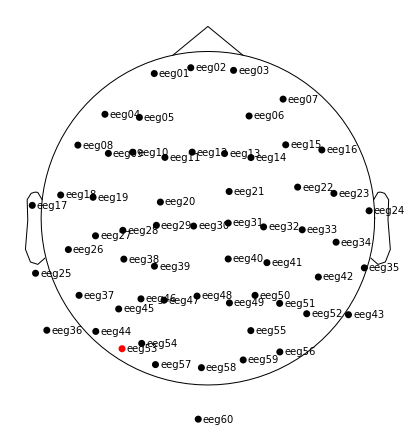

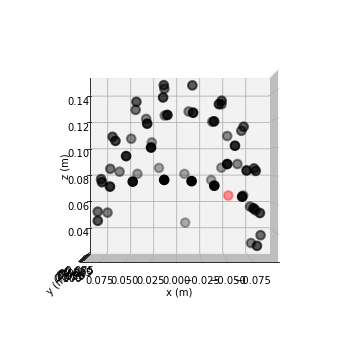

In [8]:
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors('3d')

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


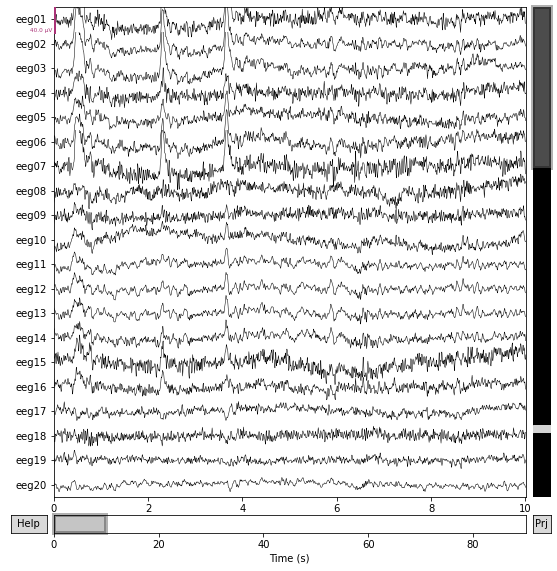

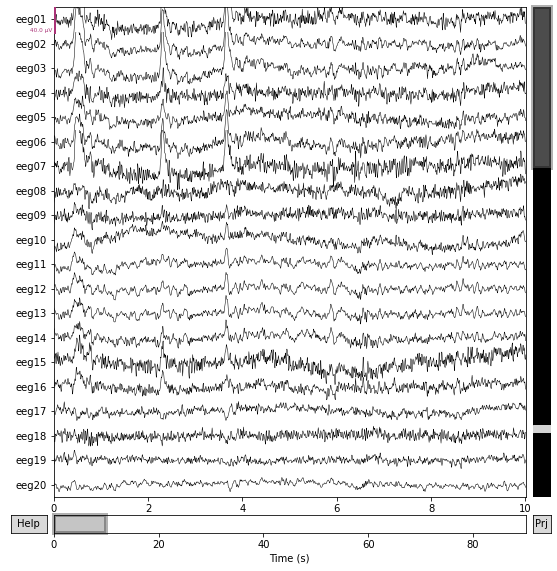

In [9]:
raw.plot()

## Epoching

In [10]:
np.unique(events[:, -1])

array([ 1,  2,  3,  4,  5, 32])

In [11]:
event_dict = {'auditory/left' : 1, 'auditory/right' : 2 , 'visual/left' : 3 , 'visual/right' : 4, 'face' : 5, 'buttonpress' : 32}

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


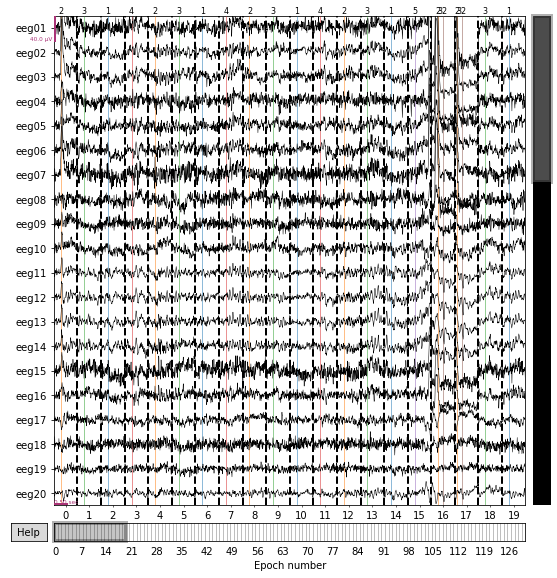

In [12]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7, preload=True, verbose=False)
fig = epochs.plot(events=events)